### Setting the Environment

Read in the data and defining some functions that we'll use later.

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

data = pd.read_csv("AmesHousing.txt", delimiter='\t')

### think to moving these below, after features transformation
#train = data[0:1460]
#test = data[1460:]

def transform_features():
    return data

def select_features():
    return data[["Gr Liv Area","SalePrice"]]

def train_and_test(df_train, df_test):
    dataset = select_features()
    cols = list(dataset.index)
    cols.remove("SalePrice")
    
    lr = LinearRegression()
    lr.fit(dataset[cols],dataset['SalePrice'])
    
    kf = KFold()
    return cross_val_score(lr,dataset[cols],df_test['SalePrice'],scoring="neg_mean_squared_error",cv=kf)


### Working on transforming features

The function `transform_features()` will do the following:
* dropping columns with more than `25%` of missing values
* dropping columns that are not helpful for making predictions
* dropping columns that leak information
* transforming columns to better represent values
* encoding numerical columns as categorical because the numbers don't have any semantic meaning (e.g.: MS SubClass)
* dropping categorical columns with more than `95%` of the values that belong to a specific category. This would be similar to a low variance numerical feature (no variability in the data for the model to capture).
* filling missing values


In [122]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [124]:
null_values = data.isnull().sum()
null_values[null_values > 0]

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [125]:
### dropping columns with more than 25% of missing values
def transform_features(df):
    isnull_features = df.isnull().sum()
    index = isnull_features[isnull_features < df.shape[0]*.25].index
    copy = df[index]
    return copy

transformed_data = transform_features(data)
transformed_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [126]:
null_values = transformed_data.isnull().sum()
null_values[null_values > 0]

Lot Frontage      490
Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin SF 1        1
BsmtFin Type 2     81
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64

In [127]:
### dropping useless columns
def transform_features(df):
    ### dropping columns with more than 25% of missing values
    isnull_features = df.isnull().sum()
    index = isnull_features[isnull_features < df.shape[0]*.25].index
    copy = df[index]
    
    ### Order and PID are useless
    copy = copy.drop(['Order','PID'],axis=1)
    
    ### drop LEAK information columns
    copy = copy.drop(['Mo Sold','Yr Sold'],axis=1)
    
    ### to better represent how old a house is
    copy["years_until_remod"] = copy["Year Remod/Add"] - copy["Year Built"]
    copy = copy.drop(['Year Remod/Add','Year Built'], axis=1)
    
    ### check unique values more than 95%, if so drop the column
    ### else astype category and pd.get_dummies
    ### adding 'MS SubClass' because its numbers don't have any semantic meaning
    text_cols = copy.select_dtypes(include=["object"]).columns.tolist()
    text_cols = ['MS SubClass'] + text_cols
    
    dropped_cols = list()
    for col in text_cols:
        max_value = copy[col].value_counts().max()
        sum_value = copy[col].value_counts().sum()
        if (max_value > sum_value*.95):
            del copy[col]
            dropped_cols.append(col)
        else:
            copy[col] = copy[col].astype("category")
            dummy_cols = pd.get_dummies(copy[col])
            copy = pd.concat([copy,dummy_cols],axis=1)
            del copy[col]
    print("dropped columns with low variance:", dropped_cols)
    
    ### replacing missing values with mean values
    null_values = copy.isnull().sum()
    mv_cols = null_values[null_values > 0].index
    copy[mv_cols] = copy[mv_cols].fillna(copy[mv_cols].mean())
    
    return copy

### transform the test data set
transformed_data = transform_features(data)
transformed_data.head()

dropped columns with low variance: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Garage Cond']


,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,New,Oth,VWD,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,0,0,0,1,0,0,0,0,1,0
1,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,0,0,0,1,0,0,0,0,1,0
2,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,0,0,0,1,0,0,0,0,1,0
3,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,...,0,0,0,1,0,0,0,0,1,0
4,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,...,0,0,0,1,0,0,0,0,1,0


In [128]:
### check to confirm there are no missing values
null_values = transformed_data.isnull().sum()
null_values[null_values > 0]

Series([], dtype: int64)

In [135]:
### splitting the data set into train/test
half_df = int(transformed_data.shape[0]/2)
train = transformed_data[0:half_df]
test = transformed_data[half_df:]

train.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,New,Oth,VWD,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,0,0,0,1,0,0,0,0,1,0
1,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,0,0,0,1,0,0,0,0,1,0
2,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,0,0,0,1,0,0,0,0,1,0
3,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,...,0,0,0,1,0,0,0,0,1,0
4,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,...,0,0,0,1,0,0,0,0,1,0


In [136]:
test.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,New,Oth,VWD,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
1465,72.00000,7226,7,5,0.0,0.0,0.0,798.0,798.0,798,...,0,0,0,1,0,0,0,0,1,0
1466,96.00000,11690,8,5,192.0,0.0,0.0,850.0,850.0,886,...,0,0,0,1,0,0,0,0,1,0
1467,70.00000,8750,7,5,0.0,642.0,0.0,273.0,915.0,933,...,0,0,0,1,0,0,0,0,1,0
1468,37.00000,4435,6,5,170.0,686.0,0.0,162.0,848.0,848,...,0,0,0,1,0,0,0,0,1,0
1469,69.22459,4426,6,5,205.0,662.0,0.0,186.0,848.0,848,...,0,0,0,1,0,0,0,0,1,0


### Working on Selecting features

* analyzing features correlation
* re-defining the select_features() function


In [216]:
import seaborn as sns

#plt.figure(figsize=(10,6))

### correlating features and taking those with 
### strongest correlation with SalePrice
corrs = abs(train.corr()['SalePrice']).sort_values()
strong_corrs = corrs[corrs > .50]
strong_corrs

BsmtFin SF 1     0.512815
Mas Vnr Area     0.515532
Full Bath        0.519375
Ex               0.528823
TA               0.528855
Garage Yr Blt    0.545158
PConc            0.553074
TA               0.584479
Ex               0.590724
Ex               0.607698
1st Flr SF       0.656942
Garage Area      0.663488
Garage Cars      0.664468
Total Bsmt SF    0.682923
Gr Liv Area      0.699537
Overall Qual     0.805201
SalePrice        1.000000
Name: SalePrice, dtype: float64

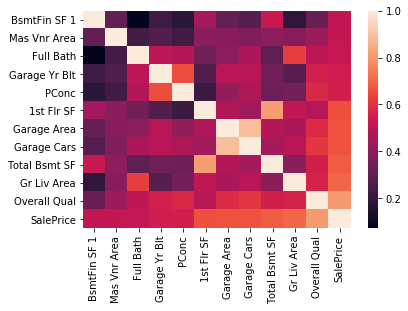

In [217]:
### removing duplicates coming from get_dummies 
### of categorical data with the same values
### e.g.: columns 'Exter Qual' and 'Exter Cond' with same qualities
strong_index = strong_corrs.index.drop_duplicates(keep=False)

corrmat = train[strong_index].corr()
sns.heatmap(corrmat)

In [223]:
def select_features(df_train):
    corrs = abs(df_train.corr()['SalePrice']).sort_values(ascending=False)
    strong_three_cols = corrs.index[0:6]
    return strong_three_cols

print(select_features(train))

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF',
       'Garage Cars', 'Garage Area'],
      dtype='object')


### Training and Testing

* let's add a parameter that controls the type of cross validation that occurs
  * it will accept only the values `"simple"` and `"kfold"`
* with `simple` cross validation we'll train and test a model on both the original dataset and that one returned from the `transform_features()` function
* with `kfold` cross validation we'll combine train and test, then subset the dataframe using a `fold` column and test using different folds

In [261]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

def train_and_test(df_train, df_test, cv_type):
    if cv_type == "simple":
        cols = list(select_features(df_train))
        cols.remove("SalePrice")
        
        ### train a model on the training set
        lr_train = LinearRegression()
        lr_train.fit(df_train[cols],df_train['SalePrice'])
        ### and test it on the test set
        labels_train = lr_train.predict(df_test[cols])
        ### RMSE for training set
        mse_train = mean_squared_error(df_test['SalePrice'], labels_train)
        rmse_train = np.sqrt(mse_train)
        
        ### train a model on the test set
        lr_test = LinearRegression()
        lr_test.fit(df_test[cols],df_test['SalePrice'])
        ### and test it on the training set
        labels_test = lr_test.predict(df_train[cols])
        ### RMSE for test set
        mse_test = mean_squared_error(df_train['SalePrice'], labels_test)
        rmse_test = np.sqrt(mse_test)
        
        return list([rmse_train, rmse_test, np.mean([rmse_train, rmse_test])])
    
    elif cv_type == "kfold":
        dataset = pd.concat([train,test])
        kf = KFold(n_splits=10, shuffle=True, random_state=1)
        knn = KNeighborsRegressor()
        mse_scores = cross_val_score(knn,dataset,dataset['SalePrice'],scoring="neg_mean_squared_error",cv=kf)
        rmse_scores = [np.absolute(m)**.5 for m in mse_scores]
        rmse_scores.append(np.mean(rmse_scores))
        
        return rmse_scores

simple_validation_rmses = train_and_test(train, test, "simple")
kfold_validation_rmses = train_and_test(train, test, "kfold")
print("For both lists, the last element is the average of the values.\n")
print("simple validation metrics:",simple_validation_rmses)
print("")
print("kfold validation metrics:",kfold_validation_rmses)

For both lists, the last element is the average of the values.

simple validation metrics: [41799.777530831743, 35464.941099587362, 38632.359315209556]

kfold validation metrics: [2703.5578034989494, 1288.9217878341508, 6680.1731712650017, 6075.8364947094879, 1177.3939000045477, 1280.1456983524338, 1099.3847871910768, 2961.6890950204656, 3911.2642895789008, 669.8565610809593, 2784.8223588535975]


### Further developments

Here's some potential next steps:
* Continue iteration on feature engineering:
  * Reserach some other approaches to feature engineering online around housing data
  * Visit the [Kaggle kernels page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels) for this dataset to see approaches others took

* Improve feature selection:
  * Research ways of doing feature selection better with categorical columns

